![https://brilliant-staff-media.s3-us-west-2.amazonaws.com/tiffany-wang/TGbEPp4Cad.png](https://brilliant-staff-media.s3-us-west-2.amazonaws.com/tiffany-wang/TGbEPp4Cad.png)

This work used a dataset from daily meteorological observations for 5 stations, the aim is to predict whether or not it will rain tomorrow using the binary classification model K-Nearest Neighbour (KNN). Then use the confusion matrix to measure the quality of the model that was built. 

**Variable prediction:**

1. Stasiun: Weather Station
1. Tanggal : Date
1. Tn: Minimum temperature (° C)
1. Tx: Maximum temperature (° C)
1. Tavg: Average temperature (° C)
1. RR: Rainfall (mm)
1. Hari_Hujan: Ground truth rainy today


**Variable target:**

1. Besok_Hujan: Ground truth tomorrow weather forecast



# What is K-Nearest Neighbour (KNN) ?

is a non-parametric method proposed by Thomas Cover used for classification and regression.[[1](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)] In both cases, the input consists of the k closest training examples in the feature space. The output depends on whether k-NN is used for classification or regression:

* In k-NN classification, the output is a class membership. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.
* In k-NN regression, the output is the property value for the object. This value is the average of the values of k nearest neighbors.

k-NN is a type of instance-based learning, or lazy learning, where the function is only approximated locally and all computation is deferred until function evaluation. Since this algorithm relies on distance for classification, normalizing the training data can improve its accuracy dramatically. 

Both for classification and regression, a useful technique can be to assign weights to the contributions of the neighbors, so that the nearer neighbors contribute more to the average than the more distant ones. For example, a common weighting scheme consists in giving each neighbor a weight of 1/d, where d is the distance to the neighbor. The neighbors are taken from a set of objects for which the class (for k-NN classification) or the object property value (for k-NN regression) is known. This can be thought of as the training set for the algorithm, though no explicit training step is required.

**
Example**

![https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/KnnClassification.svg/220px-KnnClassification.svg.png](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/KnnClassification.svg/220px-KnnClassification.svg.png)


As you can see above on the Example of k-NN classification. The test sample (green dot) should be classified either to blue squares or to red triangles. If k = 3 (solid line circle) it is assigned to the red triangles because there are 2 triangles and only 1 square inside the inner circle. If k = 5 (dashed line circle) it is assigned to the blue squares (3 squares vs. 2 triangles inside the outer circle).


**Parameter selection**

The best choice of k depends upon the data; generally, larger values of k reduces effect of the noise on the classification[[1](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)] but make boundaries between classes less distinct. 


**The 1-nearest neighbor classifier**


The most intuitive nearest neighbour type classifier is the one nearest neighbour classifier that assigns a point x to the class of its closest neighbour in the feature space, that is ![https://wikimedia.org/api/rest_v1/media/math/render/svg/f815904edbff2ce82502172ec0dce3311d57f2bb](https://wikimedia.org/api/rest_v1/media/math/render/svg/f815904edbff2ce82502172ec0dce3311d57f2bb)

As the size of training data set approaches infinity, the one nearest neighbour classifier guarantees an error rate of no worse than twice the Bayes error rate (the minimum achievable error rate given the distribution of the data).

# What is Confusion Matrix ?

Confusion Matrix is commonly used for a summarization of prediction results on a classification problem.The number of correct and incorrect predictions is summarized with counting values and each value broken down for each class. Each of them is the key to the confusion matrix. It shows the classification model is confused when it makes predictions, at this point in here it gives us insight not only into the errors being made by a classifier but also show the types of errors that are being made [[2](https://www.geeksforgeeks.org/confusion-matrix-machine-learning/)].


![https://miro.medium.com/max/712/1*Z54JgbS4DUwWSknhDCvNTQ.png](https://miro.medium.com/max/712/1*Z54JgbS4DUwWSknhDCvNTQ.png)

Where,

● Class 1 is represent Positive Class

● Class 0 is represent Negative Class

Definition of the Terms:

● Positive (P) is an observation of positive
(for example: is a laptop).

● Negative (N) is an observation of not positive
(for example: is not a laptop).

● True Positive (TP) is an observation of positive, and is predicted
to be positive.

● False Negative (FN) is an observation of positive, but is predicted
negative.

● True Negative (TN) is an observation of negative, and is predicted
to be negative.

● False Positive (FP) is an observation of negative, but is predicted
positive.

**To calculate the Confusion Matrix, the formula is defined as follow:**

![https://www.nosimpler.me/wp-content/uploads/2017/03/precision-recall-2.png](https://www.nosimpler.me/wp-content/uploads/2017/03/precision-recall-2.png)

where, 

**Accuracy**

is closeness of the measurements to a specific value. Accuracy has two definitions:

1. More commonly, it is a description of systematic errors, a measure of statistical bias; low accuracy causes a difference between a result and a "true" value. ISO calls this trueness.
2. Alternatively, ISO defines[[3](https://en.wikipedia.org/wiki/Accuracy_and_precision)] accuracy as describing a combination of both types of observational error above (random and systematic), so high accuracy requires both high precision and high trueness.


**Precision and Recall**

According to [[3](https://en.wikipedia.org/wiki/Accuracy_and_precision)] Precision is a description of random errors, a measure of statistical variability. In simpler terms, given a set of data points from repeated measurements of the same quantity, the set can be said to be accurate if their average is close to the true value of the quantity being measured, while the set can be said to be precise if the values are close to each other. 


**Recall**
1. 
is defined as the fraction of relevant documents retrieved compared to the total number of relevant documents (true positives divided by true positives+false negatives).



# Practical example

Import Library

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
from sklearn import preprocessing


Read Data

In [2]:
data = pd.read_csv('../input/datat3rr/DataT3RR.csv')
print('Size of weather data frame is :',data.shape)
data.info()
data[0:10]

Size of weather data frame is : (923, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Stasiun      923 non-null    object 
 1   Tanggal      923 non-null    object 
 2   Tn           923 non-null    float64
 3   Tx           923 non-null    float64
 4   Tavg         923 non-null    float64
 5   RR           923 non-null    float64
 6   Hari_hujan   923 non-null    int64  
 7   Besok_hujan  923 non-null    int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 57.8+ KB


,Stasiun,Tanggal,Tn,Tx,Tavg,RR,Hari_hujan,Besok_hujan
0,Stasiun Meteorologi Nangapinoh,20-03-2010,20.3,31.1,25.8,108.0,1,1
1,Stasiun Meteorologi Maritim Tanjung Mas,07-03-2010,25.0,31.8,29.2,106.0,1,1
2,Stasiun Klimatologi Mempawah,09-01-2009,23.4,29.6,25.8,100.6,1,1
3,Stasiun Meteorologi Cilacap,09-01-2009,23.6,28.0,25.6,93.9,1,1
4,Stasiun Klimatologi Bogor,21-01-2009,21.1,29.4,25.5,93.0,1,1
5,Stasiun Meteorologi Maritim Tanjung Mas,14-01-2009,24.0,27.0,24.9,92.8,1,1
6,Stasiun Meteorologi Maritim Tanjung Mas,12-01-2010,25.0,30.6,27.4,89.0,1,1
7,Stasiun Meteorologi Maritim Tanjung Mas,25-03-2010,25.0,32.0,28.3,82.2,1,1
8,Stasiun Meteorologi Maritim Tanjung Mas,13-03-2010,26.4,33.4,29.3,82.0,1,1
9,Stasiun Klimatologi Bogor,10-02-2010,21.8,33.2,25.8,81.2,1,1


In [3]:
data.count().sort_values()

Stasiun        923
Tanggal        923
Tn             923
Tx             923
Tavg           923
RR             923
Hari_hujan     923
Besok_hujan    923
dtype: int64

Eliminate irrelevant variables in analysis such as  Stasiun(Station), Tanggal(Date)

In [4]:
data = data.drop(columns=['Stasiun','Tanggal'],

                 axis=1)
data = data.dropna(how='any')
print(data.shape)

(923, 6)


In [5]:
print(data.shape)
data.head()

(923, 6)


,Tn,Tx,Tavg,RR,Hari_hujan,Besok_hujan
0,20.3,31.1,25.8,108.0,1,1
1,25.0,31.8,29.2,106.0,1,1
2,23.4,29.6,25.8,100.6,1,1
3,23.6,28.0,25.6,93.9,1,1
4,21.1,29.4,25.5,93.0,1,1


VISUALIZING THE DATA

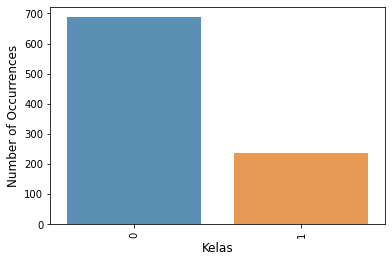

In [6]:
cnt_pro = data['Besok_hujan'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(cnt_pro.index, cnt_pro.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Kelas', fontsize=12)
plt.xticks(rotation=90)
plt.show();

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


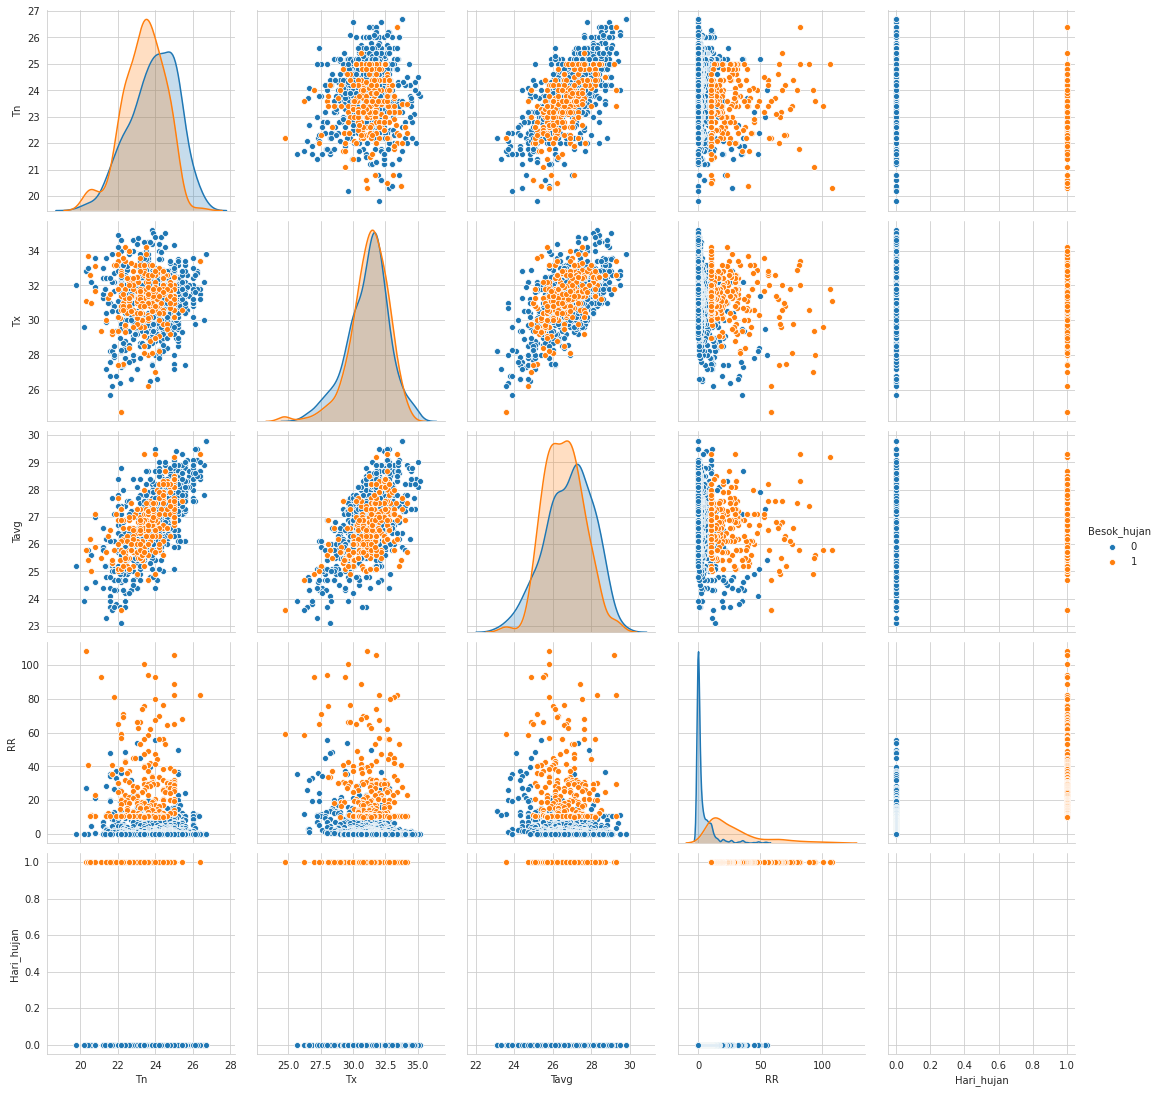

In [7]:
sns.set_style("whitegrid")
sns.pairplot(data,hue="Besok_hujan",size=3);
plt.show()

In [8]:
# Calculate the correlation matrix
corr = data.corr()
corr1 = pd.DataFrame(abs(corr['Besok_hujan']),columns = ['Besok_hujan','Tn','Tx','Tavg'])
nonvals = corr1.loc[corr1['Besok_hujan'] < 0.005]
print('Var correlation < 0.5%',nonvals)
nonvals = list(nonvals.index.values)

# We extract variables with correlation less than 0.5%
data1 = data.drop(columns=nonvals,axis=1)
print('Data Final',data1.shape)

Var correlation < 0.5% Empty DataFrame
Columns: [Besok_hujan, Tn, Tx, Tavg]
Index: []
Data Final (923, 6)


# Plotting Heatmap

Heatmap can be defined as a method of graphically representing numerical data where individual data points contained in the matrix are represented using different colors. The colors in the heatmap can denote the frequency of an event, the performance of various metrics in the data set, and so on. Different color schemes are selected by varying businesses to present the data they want to be plotted on a heatmap [2].The color palette in the side represents the amount of correlation among the variables. The lighter shade represents a high correlation.

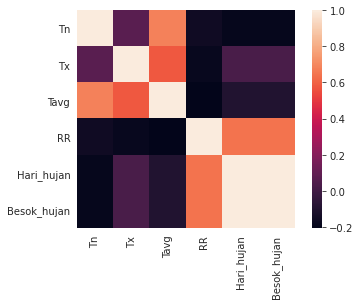

In [9]:
data = data[['Tn','Tx','Tavg','RR','Hari_hujan','Besok_hujan']] #Subsetting the data
cor = data.corr() #Calculate the correlation of the above variables
sns.heatmap(cor, square = True) #Plot the correlation as heat map

### Data for training and testing

To select a set of training data that will be input in the Machine Learning algorithm, to ensure that the classification algorithm training can be generalized well to new data. For this study using a sample size of 30%, assumed it ideal ratio between training and testing

In [10]:
from sklearn.model_selection import train_test_split
Y = data1['Besok_hujan']
X = data1.drop(columns=['Besok_hujan'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=9)

In [11]:
print('X train shape: ', X_train.shape)
print('Y train shape: ', Y_train.shape)
print('X test shape: ', X_test.shape)
print('Y test shape: ', Y_test.shape)

X train shape:  (646, 5)
Y train shape:  (646,)
X test shape:  (277, 5)
Y test shape:  (277,)


# classification

In [12]:
from sklearn.neighbors import KNeighborsClassifier

# We define the model
knncla = KNeighborsClassifier(n_neighbors=5,n_jobs=-1)

# We train model
knncla.fit(X_train, Y_train)

# We predict target values
Y_predict6 = knncla.predict(X_test)

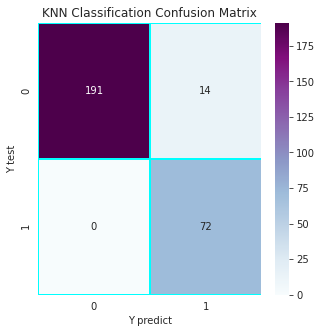

In [13]:
# The confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

knncla_cm = confusion_matrix(Y_test, Y_predict6)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(knncla_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="BuPu")
plt.title('KNN Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

Accuracy, Precision, Recall

In [14]:
test_acc_knncla = round(knncla.fit(X_train,Y_train).score(X_test, Y_test)* 100, 2)
train_acc_knncla = round(knncla.fit(X_train, Y_train).score(X_train, Y_train)* 100, 2)

In [15]:
#Accuracy
model1 = pd.DataFrame({
    'Model': ['KNN'],
    'Train Score': [train_acc_knncla],
    'Test Score': [test_acc_knncla]
})
model1.sort_values(by='Test Score', ascending=False)

,Model,Train Score,Test Score
0,KNN,97.68,94.95


In [16]:
#Precision, Recall
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(Y_test, Y_predict6)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.84


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.84')

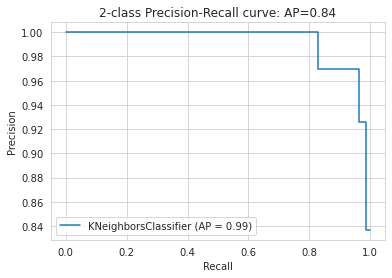

In [17]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(knncla,X_train, Y_train)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

## Features Selection



In [18]:
Y1 = data['Besok_hujan']
X1 = data.drop(columns=['Besok_hujan','Hari_hujan'])

from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

lsvc = LinearSVC(C=0.05, penalty="l1", dual=False,random_state=9).fit(X1, Y1)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X1)
cc = list(X1.columns[model.get_support(indices=True)])
print(cc)
print(len(cc))

['Tn', 'Tx', 'RR']
3


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


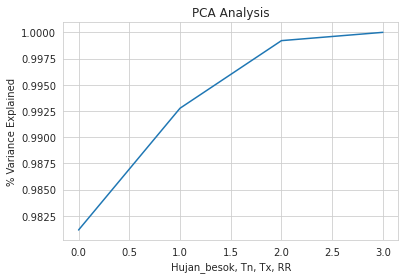

In [19]:
# Principal component analysis
from sklearn.decomposition import PCA

pca = PCA().fit(X1)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Hujan_besok, Tn, Tx, RR')
plt.ylabel('% Variance Explained')
plt.title('PCA Analysis')
plt.grid(True)
plt.show()

In [20]:
# Percentage of total variance explained
variance = pd.Series(list(np.cumsum(pca.explained_variance_ratio_)), 
                        index= list(range(1, 5))) 
print(variance[30:70])

Series([], dtype: float64)


In [21]:
X1 = data[cc] 
from sklearn.model_selection import train_test_split
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.3, random_state=9)

### Classification

The classification is performed using the techniques described above, where the only thing that changes is the training and testing data.

In [22]:
# K-Nearest Neighbor classification
knncla.fit(X1_train, Y1_train)
Y1_predict6 = knncla.predict(X1_test)
knncla_cm = confusion_matrix(Y1_test, Y1_predict6)
score1_knncla= knncla.score(X1_test, Y1_test)

##### The confusion matrix

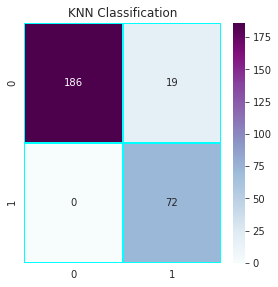

In [23]:
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(3, 3, 1) 
ax1.set_title('KNN Classification')
sns.heatmap(data=knncla_cm, annot=True, linewidth=0.7, linecolor='cyan',cmap="BuPu" ,fmt='g', ax=ax1)
plt.show()

In [24]:
Testscores1 = pd.Series([score1_knncla], index=[ 'K-Nearest Neighbour Score']) 
print(Testscores1)

K-Nearest Neighbour Score    0.931408
dtype: float64


In [25]:
#Precision, Recall
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(Y1_test, Y1_predict6)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.79
